In [149]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

#Number of atoms

N=20000
#---------------------------------------------------------------

Theta = np.pi/2
Phi   = 0

#---------------------------------------------------------------


theta = Theta
phi   = Phi



matrix_array=[]

# X matrix


f10x=np.zeros((4, 4),dtype=np.complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+np.transpose(f10x)
matrix_array.append(f10x)

f20x=np.zeros((4, 4),dtype=np.complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+np.transpose(f20x)
matrix_array.append(f20x)

f30x=np.zeros((4, 4),dtype=np.complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+np.transpose(f30x)
matrix_array.append(f30x)

f21x=np.zeros((4, 4),dtype=np.complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+np.transpose(f21x)
matrix_array.append(f21x)

f31x=np.zeros((4, 4),dtype=np.complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+np.transpose(f31x)
matrix_array.append(f31x)

f32x=np.zeros((4, 4),dtype=np.complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+np.transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=np.zeros((4, 4),dtype=np.complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+np.conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=np.zeros((4, 4),dtype=np.complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+np.conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=np.zeros((4, 4),dtype=np.complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+np.conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=np.zeros((4, 4),dtype=np.complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+np.conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=np.zeros((4, 4),dtype=np.complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+np.conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=np.zeros((4, 4),dtype=np.complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+np.conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=np.complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=np.complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=np.complex_)
f2z[2][2]=1
matrix_array.append(f2z)




#-----------------------------------------------------------------------------------------------------

Psi_0=np.zeros((4,1),dtype=np.complex_)
Psi_0[0][0]=np.cos(Theta/2)
Psi_0[1][0]=np.sin(Theta/2)*np.exp(1j*Phi)


Psi_0_adj=np.transpose(np.conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(np.matmul(Psi_0_adj,np.matmul(j,Psi_0))[0][0])

    

Cov_mat=np.zeros((15, 15),dtype=np.complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(np.matmul(Psi_0_adj,np.matmul( np.matmul(matrix_array[i],matrix_array[j])+np.matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(np.real(Cov_mat[j])))    
    

from scipy import stats

In [150]:
gR=1
DeltaR=0
KapR= 15 *gR*sqrt(( (cos(Theta/2))**2 )*N)

fractionR=0.6
OmegaR= fractionR*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))


gL=0
DeltaL=0   
KapL=15 *gL*sqrt(( (sin(Theta/2))**2 )*N)

fractionL=0.6
OmegaL= fractionL*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))

In [151]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    
    alpRx=z[15]
    alpRy=z[16]
    alpLx=z[17]
    alpLy=z[18]
            
    s10x=z[0]   #x10
    s20x=z[1]   #x20
    s30x=z[2]   #x30  
    s21x=z[3]   #x21 
    s31x=z[4]   #x31
    s32x=z[5]   #x32
            
    s10y=z[6]   #y10
    s20y=z[7]   #y20
    s30y=z[8]   #y30
    s21y=z[9]   #y21
    s31y=z[10]  #y31
    s32y=z[11]  #y32
            
    s0z=z[12]   #z0
    s1z=z[13]   #z1
    s2z=z[14]   #z2
        
        
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx  +(gR/sqrt(2))*s30y
            
    dalpRydt = DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt(2))*s30x
             
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt(2))*s21y 
        
    dalpLydt = DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt(2))*s21x 
         
      
        
    ds10xdt   = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y
            
    ds20xdt = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y
            
    ds30xdt = (-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
    ds21xdt = (-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
    ds31xdt = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y    
            
    ds32xdt = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y
        
    ds10ydt = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x
        
    ds20ydt = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x

    ds30ydt = (2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
    ds21ydt = (2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
    ds31ydt = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x
            
    ds32ydt = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x
        
    ds0zdt = (sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
    ds1zdt = (sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
    ds2zdt = (-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return dzdt

In [152]:
Sum_TWA=np.zeros((15,1))

for j in range(N):
    Sum_TWA=Sum_TWA+np.random.multivariate_normal(np.real(Miu), Cov_mat_list, 1).T
    
Rand=list(Sum_TWA.flatten())+[np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5)]

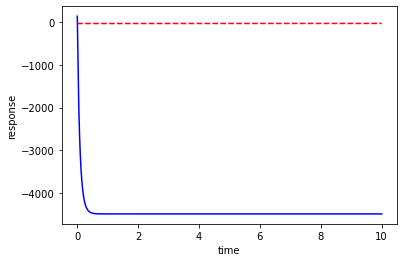

In [153]:
tf=10
steps=500000
t = np.linspace(0,tf,steps)

def solution():
    
    Sum_TWA=np.zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+np.random.multivariate_normal(np.real(Miu), Cov_mat_list, 1).T
    
    z0=list(Sum_TWA.flatten())+[np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5)]
    
# time points
    

# solve ODE
    z = odeint(model,z0,t)
    
    return z

z=solution()

# plot results
plt.plot(t,z[:,10],'b-')#,label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--')#,label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
#plt.legend(loc='best')
plt.show()

In [154]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(itera=itera,N=N):
    Results =zeros((steps, 19))
    for j in range(itera):
        Trayec=solution()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [155]:
import time
t0=time.time()

itera=5

Result_varTWA_Col100 = averages(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-154-b031a4cadbb0>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages" failed type inference due to: Untyped global name 'solution': cannot determine Numba type of <class 'function'>

File "<ipython-input-154-b031a4cadbb0>", line 12:
def averages(itera=itera,N=N):
    <source elided>
    for j in range(itera):
        Trayec=solution()
        ^

  @jit
<ipython-input-154-b031a4cadbb0>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-154-b031a4cadbb0>", line 11:
def averages(itera=itera,N=N):
    <source elided>
    Results =zeros((steps, 19))
    for j in range(itera):
    ^

  @jit
C:\Users\camil\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Function "averages" was compiled in object m

0
1
2
3
4
12.745791912078857


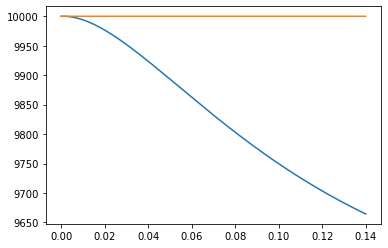

In [156]:
def constant_function(x):
    return np.full(x.shape, N/2)


index_t=7000

plt.plot(t[:index_t],Result_varTWA_Col100[:,0][:index_t]/sqrt(2))
plt.plot(t[:index_t], constant_function(t)[:index_t])


# SDEint based solution

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time

t0=time.time()


tspan = np.linspace(0, 5., 20000)


def f(y, t):
    
    
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    

    
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx  +(gR/sqrt(2))*s30y
            
    dalpRydt = DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt(2))*s30x
             
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt(2))*s21y 
        
    dalpLydt = DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt(2))*s21x 
         
      
        
    ds10xdt   = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y
            
    ds20xdt = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y
            
    ds30xdt = (-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
    ds21xdt = (-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
    ds31xdt = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y    
            
    ds32xdt = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y
        
    ds10ydt = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x
        
    ds20ydt = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x

    ds30ydt = (2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
    ds21ydt = (2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
    ds31ydt = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x
            
    ds32ydt = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x
        
    ds0zdt = (sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
    ds1zdt = (sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
    ds2zdt = (-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return np.array(dzdt)
    
    
y0=list(Sum_TWA.flatten())+[np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5)]


def GG(y, t):
    Arr=np.zeros((1,19))
    Arr[0][-1]=np.sqrt(KapL/4)
    Arr[0][-2]=np.sqrt(KapL/4)
    Arr[0][-3]=np.sqrt(KapR/4)
    Arr[0][-4]=np.sqrt(KapR/4)
    
    return np.diag(Arr[0])

result = sdeint.itoint(f, GG, y0, tspan)
result_strat = sdeint.stratint(f, GG, y0, tspan)
result_robler = sdeint.itoSRI2(f, GG, y0, tspan)
result_stratKP2iS = sdeint.stratKP2iS(f, GG, y0, tspan)




t1=time.time()


print(t1-t0)

81.60332131385803


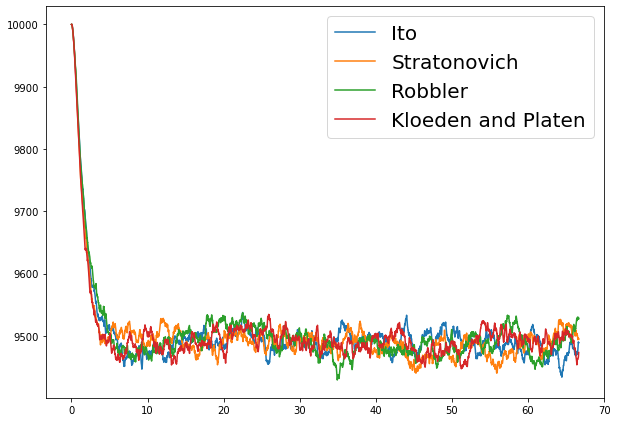

In [158]:
import matplotlib

label_size=40
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 7.2)



Omega_c=OmegaR/fractionR

plt.plot(Omega_c*tspan,result[:,0]/np.sqrt(2),label="Ito")
plt.plot(Omega_c*tspan,result_strat[:,0]/np.sqrt(2),label="Stratonovich")
plt.plot(Omega_c*tspan,result_robler[:,0]/np.sqrt(2),label="Robbler")
plt.plot(Omega_c*tspan,result_stratKP2iS[:,0]/np.sqrt(2),label="Kloeden and Platen")



plt.legend(loc="upper right",fontsize=label_size/2)
plt.show()
plt.close()


In [162]:
import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS

t0=time.time()


tspan = np.linspace(0, 5., 20000)


def f(y, t):
    
    
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    

    
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx  +(gR/sqrt(2))*s30y
            
    dalpRydt = DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt(2))*s30x
             
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt(2))*s21y 
        
    dalpLydt = DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt(2))*s21x 
         
      
        
    ds10xdt   = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y
            
    ds20xdt = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y
            
    ds30xdt = (-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
    ds21xdt = (-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
    ds31xdt = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y    
            
    ds32xdt = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y
        
    ds10ydt = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x
        
    ds20ydt = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x

    ds30ydt = (2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
    ds21ydt = (2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
    ds31ydt = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x
            
    ds32ydt = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x
        
    ds0zdt = (sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
    ds1zdt = (sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
    ds2zdt = (-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return np.array(dzdt)
    


def GG(y, t):
    Arr=np.zeros((1,19))
    Arr[0][-1]=np.sqrt(KapL/4)
    Arr[0][-2]=np.sqrt(KapL/4)
    Arr[0][-3]=np.sqrt(KapR/4)
    Arr[0][-4]=np.sqrt(KapR/4)
    
    return np.diag(Arr[0])


def SDE_sol():
    
    Sum_TWA=np.zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+np.random.multivariate_normal(np.real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5),np.random.normal(0, 0.5)]
    
    return itoint(f, GG, y0, tspan)


result = itoint(f, GG, y0, tspan)
result_strat = stratint(f, GG, y0, tspan)
result_robler = itoSRI2(f, GG, y0, tspan)
result_stratKP2iS = stratKP2iS(f, GG, y0, tspan)




t1=time.time()


print(t1-t0)

92.54087257385254


In [ ]:
plt.plot(Omega_c*tspan,result[:,0]/np.sqrt(2),label="Ito")
plt.plot(Omega_c*tspan,result_strat[:,0]/np.sqrt(2),label="Stratonovich")
plt.plot(Omega_c*tspan,result_robler[:,0]/np.sqrt(2),label="Robbler")
plt.plot(Omega_c*tspan,result_stratKP2iS[:,0]/np.sqrt(2),label="Kloeden and Platen")
plt.plot(Omega_c*tspan,SDE_sol()[:,0]/np.sqrt(2),label="Function")


plt.legend()